# Project Information

1)	Project Discription:

Using data set from UCI Repository (with time series data from 2010 to 2014) to explore the factors influencing PM2.5 in Beijing, perform machine learning algorithm to predict the PM2.5 values. Suggestion on how to improve air quality in Beijing will be given at the end.

2)	Data Set Discription:  
This hourly data set contains the PM2.5 data of US Embassy in Beijing, including 43824 instances and each instance has 13 attributes. The time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as NAN.

3)	Attribute Information:

No: row number  
year: year of data in this row  
month: month of data in this row  
day: day of data in this row  
hour: hour of data in this row  
pm2.5: PM2.5 concentration (ug/m^3)  
DEWP: Dew Point (â„ƒ)  
TEMP: Temperature (â„ƒ)  
PRES: Pressure (hPa)  
cbwd: Combined wind direction  
Iws: Cumulated wind speed (m/s)  
Is: Cumulated hours of snow  
Ir: Cumulated hours of rain  


In [46]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import pyplot as plt

air_df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
display(air_df)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [47]:
air_df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

We can see that there are 2067 rows of value of PM2.5 is null,  As the PM2.5 is our target, so remove the null rows 

In [48]:
air_df.dropna(inplace = True)
air_df.shape

(41757, 13)

In [49]:
air_df.duplicated().sum()

0

In [50]:
air_df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [51]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.5+ MB


## EDA

In [52]:
import sweetviz as sv 
flights_report = sv.analyze(air_df)
flights_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:17  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Text(0, 0.5, 'PM2.5')

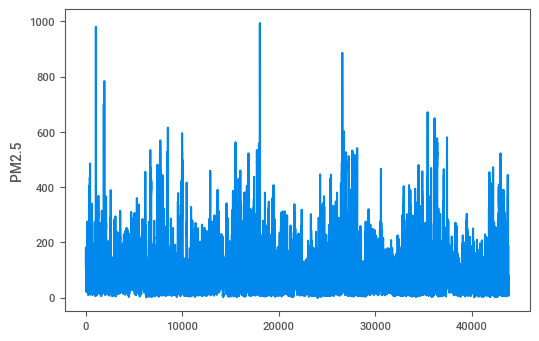

In [53]:
air_df['pm2.5'].plot()
plt.ylabel('PM2.5')

We can see that the PM2.5 rises and falls periodically, what will analyze factors make it rise and falls, then make prediction of PM2.5

<AxesSubplot:xlabel='month', ylabel='pm2.5'>

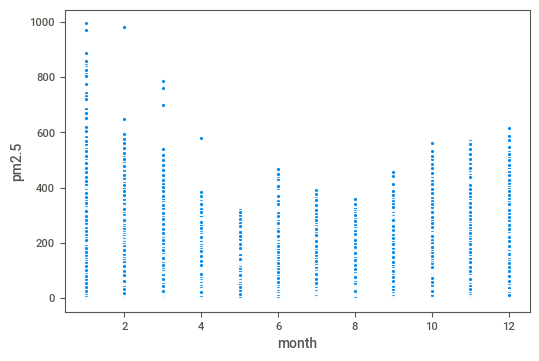

In [54]:
sns.scatterplot(x='month', y='pm2.5', data=air_df )

We can see that winter air PM2.5 is higher that other seasons, Beijing's winter is cold, seems tempture affects PM2.5

Group air quality PM2.5, the higher pm2.5, the poorer air quality

In [55]:
bins = [0,35, 75, 115, 150,250]
labels = ["good","light pollution","midium pollution","hevay pollution","extream hevay pollution"]
air_df['air quality'] = pd.cut(air_df['pm2.5'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Air quality')

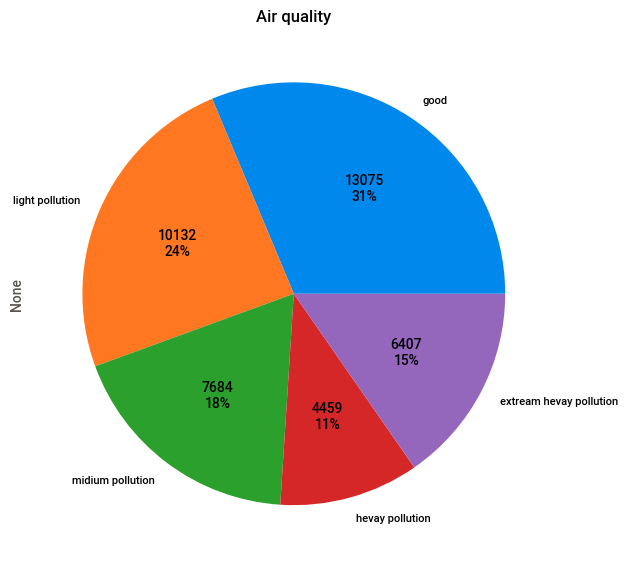

In [56]:
def label_function(val):
    return f'{val / 100 * len(air_df):.0f}\n{val:.0f}%'

air_df.groupby('air quality').size().plot(kind='pie', autopct=label_function, figsize=(7,7))
plt.title('Air quality')

Through the pie chart, we can see that only 31% days have very good air quality,  It's time to find the reasons and take actions.

Compare air quality of each year to see is there any improvement

<AxesSubplot:xlabel='year', ylabel='count'>

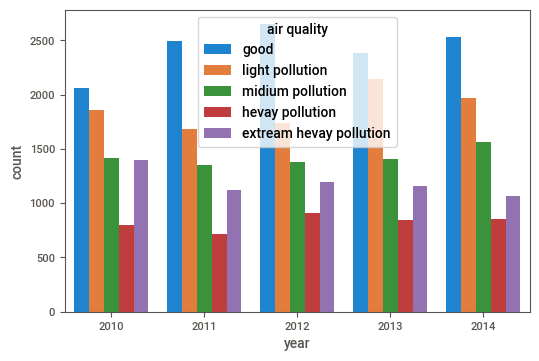

In [74]:
sns.countplot('year', data=air_df, hue='air quality')

There is no obvious improvement of air quality from 2010 to 2014.

We combine year,month,day, hour to datatime as the index of data 

In [11]:
import datetime

air_df['time'] = air_df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
air_df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
air_df = air_df.set_index('time')
air_df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Text(0.5, 0, 'datatime')

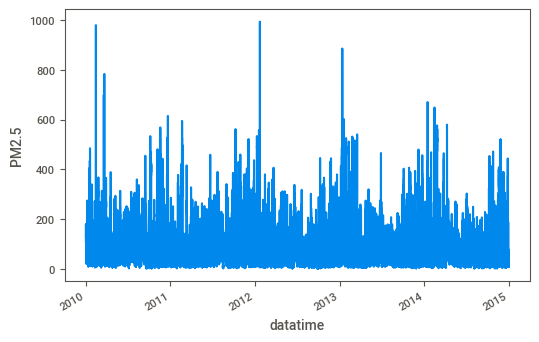

In [12]:
air_df['pm2.5'].plot()
plt.ylabel('PM2.5')
plt.xlabel('datatime')

We can see that the PM2.5 rises and falls periodically with date, what will analyze factors make it rise and falls, then make prediction of PM2.5

Check the correlation of PM2.5 with features( DEWP, TEMP,PRES, cbwd, lws, Is, iris.csv)  
DEWP: Dew Point (â„ƒ)  
TEMP: Temperature (â„ƒ)  
PRES: Pressure (hPa)  
cbwd: Combined wind direction  
Iws: Cumulated wind speed (m/s)  
Is: Cumulated hours of snow  
Ir: Cumulated hours of rain  

Text(0.5, 0, 'Dew Point (â„ƒ)')

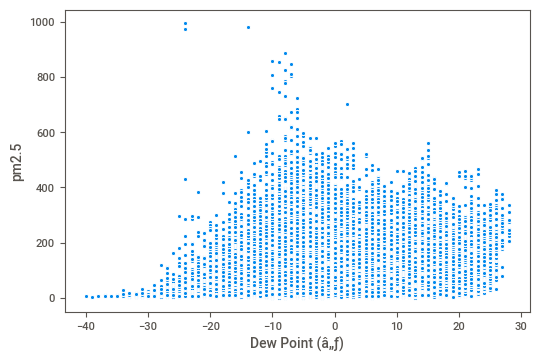

In [12]:
sns.scatterplot(x='DEWP', y='pm2.5', data=air_df )
plt.xlabel('Dew Point (â„ƒ)')

We can see that when the Dew Point at around 0 to -10,  the PM2.5 are higher than others, the PM2.5 is decreasing when Dew Point is less than -10

Text(0.5, 0, 'Temperature (â„ƒ)')

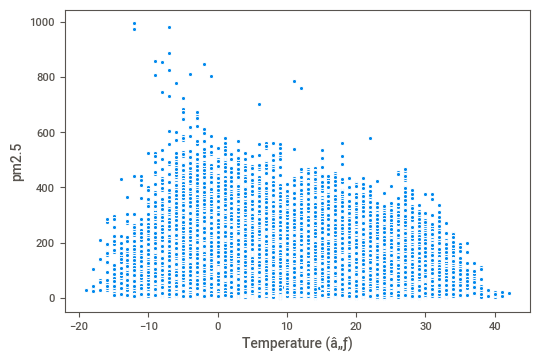

In [13]:
sns.scatterplot(x='TEMP', y='pm2.5', data=air_df )
plt.xlabel('Temperature (â„ƒ)')

Same to the Dew Point,  when tempture is between 0 to -10,   PM2.5 is higher than others

Text(0.5, 0, 'Pressure (hPa)')

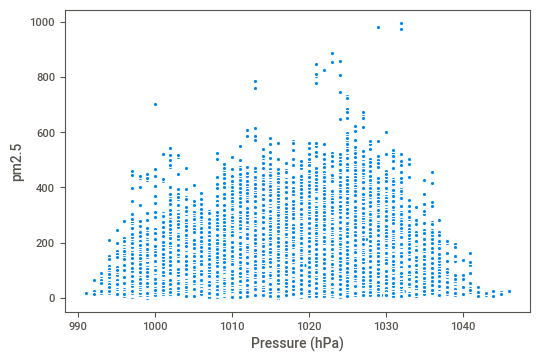

In [14]:
sns.scatterplot(x='PRES', y='pm2.5', data=air_df )
plt.xlabel('Pressure (hPa)')

Text(0.5, 0, 'Combined wind direction')

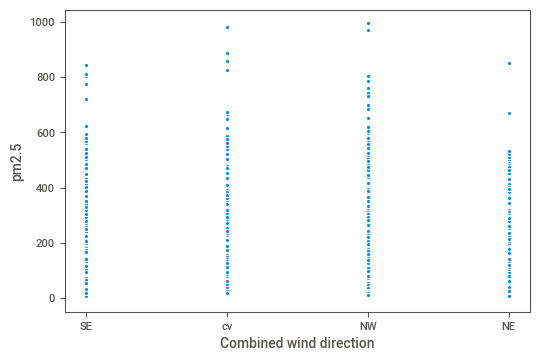

In [15]:
sns.scatterplot(x='cbwd', y='pm2.5', data=air_df )
plt.xlabel('Combined wind direction')

PM2.5 has no obviously correlation with Combined wind direction

Text(0.5, 0, 'Cumulated wind speed (m/s)')

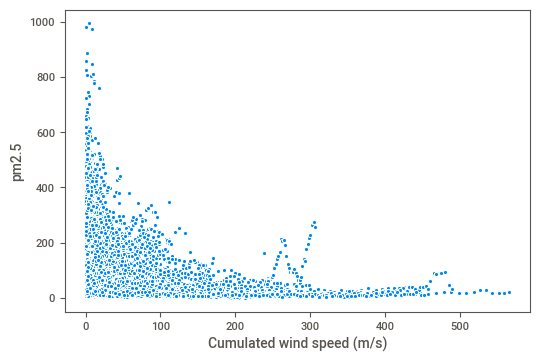

In [16]:
sns.scatterplot(x='Iws', y='pm2.5', data=air_df )
plt.xlabel('Cumulated wind speed (m/s)')

We can see that cumulated wind speed has negative correlation with PM2.5

Text(0.5, 0, 'Cumulated hours of snow')

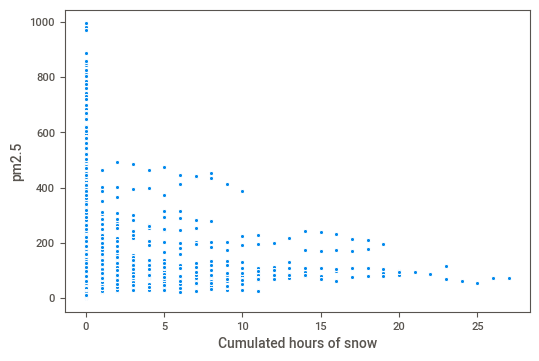

In [17]:
sns.scatterplot(x='Is', y='pm2.5', data=air_df )
plt.xlabel('Cumulated hours of snow')

We can see that snow can help to improve PM2.5

Text(0.5, 0, 'Cumulated hours of rain')

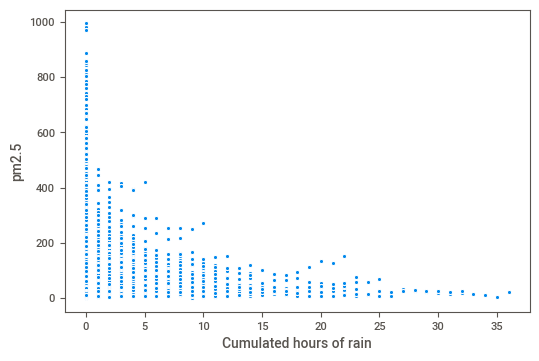

In [18]:
sns.scatterplot(x='Ir', y='pm2.5', data=air_df )
plt.xlabel('Cumulated hours of rain')

Same to the snow, rain can help to reduce PM2.5

## Insights
1. Through all above, we can see the snow, rain can help to reduce pm2.5. In particularly bad weather, artificial precipitation can be used to improve the air quality if necessary.
2. The heavy wind speed, the better air quality. 
3. Temperature and pressure also affect the pm2.5.

## Data preparing

Use one-hot encoding to split the values of cbwd to different columns.

In [19]:
air_df = air_df.join(pd.get_dummies(air_df['cbwd'])) # one-hot encoding
del air_df['cbwd']

In [20]:
air_df.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


## Determine Parameters

Split the dataset to train and test dataset.  
put the data for the past 5 days to train   
put the data one day after to test set and predict the PM2.5 value one day after  

In [21]:
seq_len = 5*24 # observe the data for the past 5 days
delay = 1*24 # predict the PM2.5 value one day after

dataary = (int)(len(air_df) / (seq_len + delay))
air_df_session = np.array([air_df.iloc[i : i + seq_len + delay].values for i in range(dataary)])
air_df_session.shape

(289, 144, 11)

In [22]:
air_df_session

array([[[129., -16.,  -4., ...,   0.,   1.,   0.],
        [148., -15.,  -4., ...,   0.,   1.,   0.],
        [159., -11.,  -5., ...,   0.,   1.,   0.],
        ...,
        [159., -19., -14., ...,   0.,   0.,   1.],
        [198., -21., -14., ...,   0.,   0.,   1.],
        [190., -21., -16., ...,   0.,   0.,   1.]],

       [[148., -15.,  -4., ...,   0.,   1.,   0.],
        [159., -11.,  -5., ...,   0.,   1.,   0.],
        [181.,  -7.,  -5., ...,   0.,   1.,   0.],
        ...,
        [198., -21., -14., ...,   0.,   0.,   1.],
        [190., -21., -16., ...,   0.,   0.,   1.],
        [210., -21., -17., ...,   1.,   0.,   0.]],

       [[159., -11.,  -5., ...,   0.,   1.,   0.],
        [181.,  -7.,  -5., ...,   0.,   1.,   0.],
        [138.,  -7.,  -5., ...,   0.,   1.,   0.],
        ...,
        [190., -21., -16., ...,   0.,   0.,   1.],
        [210., -21., -17., ...,   1.,   0.,   0.],
        [195., -19., -16., ...,   1.,   0.,   0.]],

       ...,

       [[ 68., -18., -12

In [23]:
np.random.shuffle(air_df_session)
X_train = air_df_session[:, :5*24, 1:]
y_train = air_df_session[:, :5*24, 0]
X_test = air_df_session[:, 5*24:, 1:]
y_test = air_df_session[:, 5*24:, 0]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape(-1, 10)
y_train = y_train.reshape(-10,1)
X_test = X_test.reshape(-1, 10)
y_test = y_test.reshape(-10,1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34680, 10), (34680, 1), (6936, 10), (6936, 1))

# Building model

Because this project is a regression problem, so first I come up with a few common algorithms for regression problem
1. Liner regression, it is simply a linear method to model the relationship between your independent variables and your dependent variables.
   Y= aX +b  
   
   
    
2. Logistic regression.  
   It is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. 
  But our problem is predict the pm value, it's regression problem,  so Logistic regression will not fit for this project.  
  
  
3. Polynomial regression by using PolynomialFeatures.
  Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.But the relation is no liner.
  equation like : y = ax^2 + bx + c

## Liner Regression
First, as our problem is regression problem, so we try the basic regression model: liner regression

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [25]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [3890.18505124]
Coefficients: 
 [[ 1.16443601e+01 -8.78852658e+00 -3.56323857e+00  4.92865700e-04
  -6.42554387e+00  3.55271368e-15 -7.39296004e+00 -1.47759857e+01
  -6.31962769e-01  2.28009086e+01]]


In [26]:
# with statsmodels
import statsmodels.api as sm


X_train_s = sm.add_constant(X_train) # adding a constant
 
ols_model = sm.OLS(y_train, X_train_s).fit()
predictions = ols_model.predict(X_train_s) 
 

print("")
print("statsmodels results")
print_model = ols_model.summary()
print(print_model)


statsmodels results
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     5308.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:54:26   Log-Likelihood:            -1.8079e+05
No. Observations:               34680   AIC:                         3.616e+05
Df Residuals:                   34671   BIC:                         3.617e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3112.1480     59.86

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
print('Mean Absolute Error:',mean_absolute_error(y_train, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('R-squared (R2):', r2_score(y_train, predictions))

Mean Absolute Error: 32.18819253517611
Root Mean Squared Error: 44.44351174303445
R-squared (R2): 0.5505268633327081


As we can see, the R_squared is pretty low, and MAE and RMSE are so high, so linerregression is not fit for this dataset, we try polynomial regression


Build PolynomialRegression model and train on train set，  when degree=3, it has better r2_score in train and test dataset,  when degree>3, it's overfitting on train dataset.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

polynomial_features= PolynomialFeatures(degree=3)
x_poly_train = polynomial_features.fit_transform(X_train)


lin_model = linear_model.LinearRegression()
lin_model.fit(x_poly_train, y_train)

LinearRegression()

Predict on train dataset and evaluate

In [29]:
y_poly_pred = lin_model.predict(x_poly_train) 

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_train,y_poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train,y_poly_pred)))
print('R-squared (R2):', r2_score(y_train,y_poly_pred))

Mean Absolute Error: 20.694698214638795
Root Mean Squared Error: 31.258657622602755
R-squared (R2): 0.7776548542024335


Predict on test dataset and evaluate

In [30]:
x_test_poly = polynomial_features.fit_transform(X_test)
y_test_pred = lin_model.predict(x_test_poly)

print('Test Mean Absolute Error:',mean_absolute_error(y_test,y_test_pred))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Test R-squared (R2):', r2_score(y_test,y_test_pred))

Test Mean Absolute Error: 28.48888993616116
Test Root Mean Squared Error: 44.1383631255452
Test R-squared (R2): 0.8127066699406507


Text(0.5, 0, 'Index')

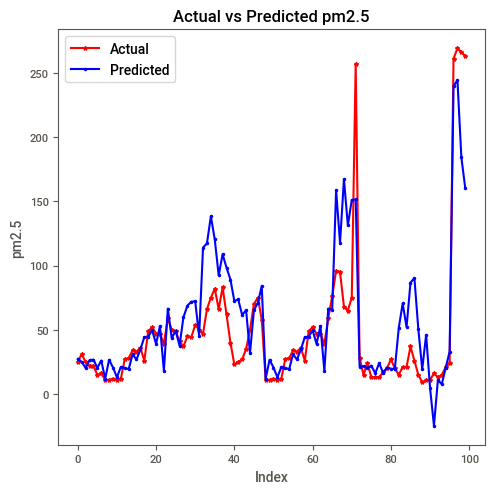

In [31]:
#Let's plot the first 100 actual and predicted values of pm2.5.
from matplotlib import pyplot as plt
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(100), y_test[:100], linestyle='-', marker='*', color='r')
plt.plot(range(100), y_test_pred[:100], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')

We can see that the r2_score on the test set is 81%, improved a lot than linerregression,  but still not very good, next semester i will build CNN model to predict

# Conclusion


We use the dataset from UCI to predict the value of  PM2.5, then to predict the air quality of Beijing. We do some insights from the dataset.​

​

Insight​

1. The air quality of Beijing is no improvement from 2010 to 2014, there are 15% extreme heavy pollution and 11% heavy pollution, so analyze the factors and take actions right now is important and necessary.​

2. Through all above, we can see the snow, rain can help to reduce pm2.5. In particularly bad weather, artificial precipitation can be used to improve the air quality if necessary.​

3. The heavy wind speed, the better air quality.​

4. Temperature and pressure also affect the pm2.5.​

As this project is a regression problem, so we choose linear regression and polynomial regression to build models and predict the pm2.5 value. we use r2_score , mean absolute error and root mean squared error to evaluate our model, we found that polynomial regression is better fit for this project than linear regression.​